**DV - Optimizing IT Support Team Performance Using Analytics ( Supportlytics)**

**Module 1** Project Initialization and Dataset Setup

1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np


2. Load the CSV Dataset

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('infosys dataset.csv')
df.head()

Saving infosys dataset.csv to infosys dataset.csv


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,15-06-2024,15-06-2024
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,15-06-2024,15-06-2024
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,16-06-2024,16-06-2024
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,17-06-2024,17-06-2024
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,20-06-2024,20-06-2024


3. Explore Dataset Structure

In [ ]:
# Shape of dataset
df.shape

# Column names
df.columns

# Data types
df.dtypes


,0
Ticket_ID,object
Ticket_Type,object
Queue,object
Priority,object
Assigned_Team,object
Category,object
Status,object
Created_Date,object
Resolved_Date,object


4. Check Missing Values

In [ ]:
# Count of missing values per column
df.isnull().sum()


,0
Ticket_ID,0
Ticket_Type,0
Queue,0
Priority,0
Assigned_Team,0
Category,46
Status,0
Created_Date,0
Resolved_Date,9760


5. Initial Ticket Distribution Analysis

In [ ]:
df['Ticket_Type'].value_counts()


,count
Ticket_Type,
Incident,7978
Request,5763
Problem,4184
Change,2075


In [ ]:
df['Priority'].value_counts()


,count
Priority,
medium,8144
high,7801
low,4055


In [ ]:
df['Category'].value_counts()


,count
Category,
Performance,2795
Bug,2046
Product,1413
IT,1203
Security,1070
...,...
Driver,1
SAP,1
Discrepancy,1


**Module 2** Data Cleaning and Feature Engineering

6. Handle Missing / Incorrect Text Data

In [ ]:
# Fill missing categorical values with 'Unknown'
text_cols = ['Ticket_Type', 'Priority', 'Category', 'Country']

for col in text_cols:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')


7. Convert Date Columns to Datetime

In [51]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'], errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], errors='coerce')


# Create Resolution Duration in days
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days


/tmp/ipython-input-3747117620.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Created_Date'] = pd.to_datetime(df['Created_Date'], errors='coerce')
/tmp/ipython-input-3747117620.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], errors='coerce')


In [52]:
median_duration = df['Resolution_Duration'].median()
df['Resolution_Duration'] = df['Resolution_Duration'].fillna(median_duration)


8. Create Resolution Duration Feature

In [12]:
# Resolution time in hours
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.total_seconds() / 3600


9. Handle Invalid Resolution Durations

In [13]:
# Remove records where resolution time is negative or null
df = df[df['Resolution_Duration'] >= 0]
df = df.dropna(subset=['Resolution_Duration'])


10. Create Priority Score Feature

In [ ]:
priority_map = {
    'Critical': 4,
    'High': 3,
    'Medium': 2,
    'Low': 1,
    'Unknown': 0
}

df['Priority_Score'] = df['Priority'].map(priority_map)


11. Verify New Features

In [ ]:
df[['Created_Date', 'Resolved_Date', 'Resolution_Duration', 'Priority', 'Priority_Score']].head()


,Created_Date,Resolved_Date,Resolution_Duration,Priority,Priority_Score
0,2024-06-15,2024-06-15,0.0,low,NaN
1,2024-06-15,2024-06-15,0.0,medium,NaN
2,2024-06-16,2024-06-16,0.0,medium,NaN
3,2024-06-17,2024-06-17,0.0,high,NaN
4,2024-06-20,2024-06-20,0.0,medium,NaN


12. Save Cleaned Dataset

In [3]:
df.to_csv('cleaned_it_support_data.csv', index=False)


*Data Dictionary*

In [16]:
data_dictionary = {
    'Ticket_ID': 'Unique identifier assigned to each IT support ticket',
    'Ticket_Type': 'Type of ticket such as Incident, Request, or Problem',
    'Queue': 'Support queue where the ticket is routed',
    'Assigned_Team': 'IT team responsible for resolving the ticket',
    'Category': 'Issue category such as Network, Software, Hardware, Security, etc.',
    'Priority': 'Urgency level of the ticket (low, medium, high)',
    'Status': 'Current state of the ticket (Open, In Progress, Resolved)',
    'Created_Date': 'Date when the ticket was created',
    'Resolved_Date': 'Date when the ticket was resolved or closed',
    'Resolution_Duration': 'Number of days taken to resolve the ticket',
    'Priority_Score': 'Numerical encoding of ticket priority used for analysis',
    'Category_Encoded': 'Numerical encoding of ticket category for clustering',
    'Cluster_ID': 'Cluster label assigned to the ticket using K-Means clustering',
    'Similarity_Score': 'Score indicating similarity of the ticket to its cluster centroid'
}

pd.DataFrame(
    data_dictionary.items(),
    columns=['Feature', 'Description']
)


,Feature,Description
0,Ticket_ID,Unique identifier assigned to each IT support ...
1,Ticket_Type,"Type of ticket such as Incident, Request, or P..."
2,Queue,Support queue where the ticket is routed
3,Assigned_Team,IT team responsible for resolving the ticket
4,Category,"Issue category such as Network, Software, Hard..."
5,Priority,"Urgency level of the ticket (low, medium, high)"
6,Status,"Current state of the ticket (Open, In Progress..."
7,Created_Date,Date when the ticket was created
8,Resolved_Date,Date when the ticket was resolved or closed
9,Resolution_Duration,Number of days taken to resolve the ticket


**MILESTONE 2**


**Module 3** Exploratory Visualization

1. Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (8,5)
sns.set_style("whitegrid")


2. Load Cleaned Dataset

In [18]:
df = pd.read_csv('/content/cleaned_it_support_data.csv')
df.head()


,Ticket_ID,Ticket_Type,Queue,Priority,Assigned_Team,Category,Status,Created_Date,Resolved_Date
0,IT001,Incident,General Inquiry,low,1 - Junior,Technical,Open,15-06-2024,15-06-2024
1,IT002,Request,Customer Service,medium,2 - Regular,Sales,Open,15-06-2024,15-06-2024
2,IT003,Request,Customer Service,medium,2 - Regular,Product,In Progress,16-06-2024,16-06-2024
3,IT004,Incident,Customer Service,high,4 - Management,Breach,Resolved,17-06-2024,17-06-2024
4,IT005,Request,Customer Service,medium,1 - Junior,Customer,In Progress,20-06-2024,20-06-2024


3. Ticket Type Distribution

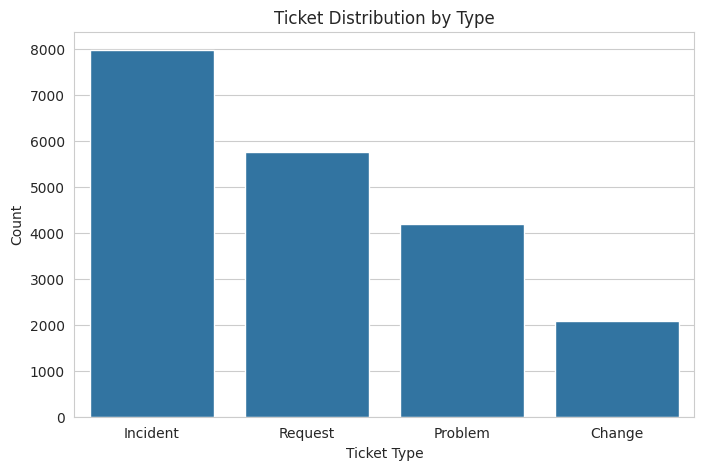

In [19]:
sns.countplot(data=df, x='Ticket_Type')
plt.title('Ticket Distribution by Type')
plt.xlabel('Ticket Type')
plt.ylabel('Count')
plt.show()


4. Ticket Distribution by Priority

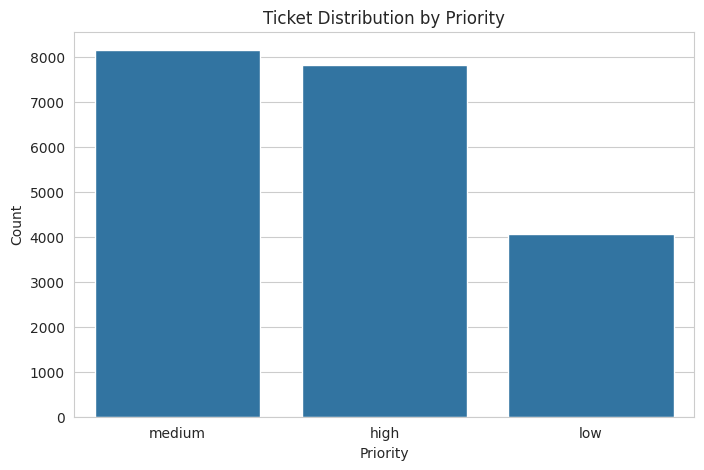

In [20]:
sns.countplot(data=df, x='Priority', order=df['Priority'].value_counts().index)
plt.title('Ticket Distribution by Priority')
plt.xlabel('Priority')
plt.ylabel('Count')
plt.show()


5. Top Categories by Frequency

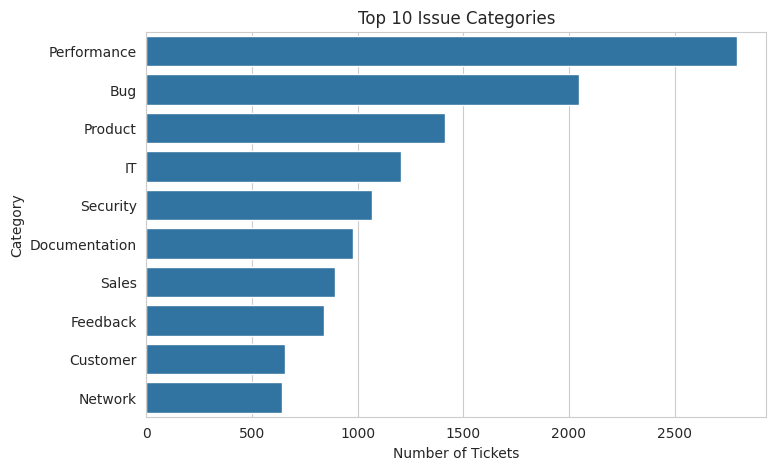

In [21]:
top_categories = df['Category'].value_counts().head(10)

sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Issue Categories')
plt.xlabel('Number of Tickets')
plt.ylabel('Category')
plt.show()


6. Tickets by Queue / Assigned Team

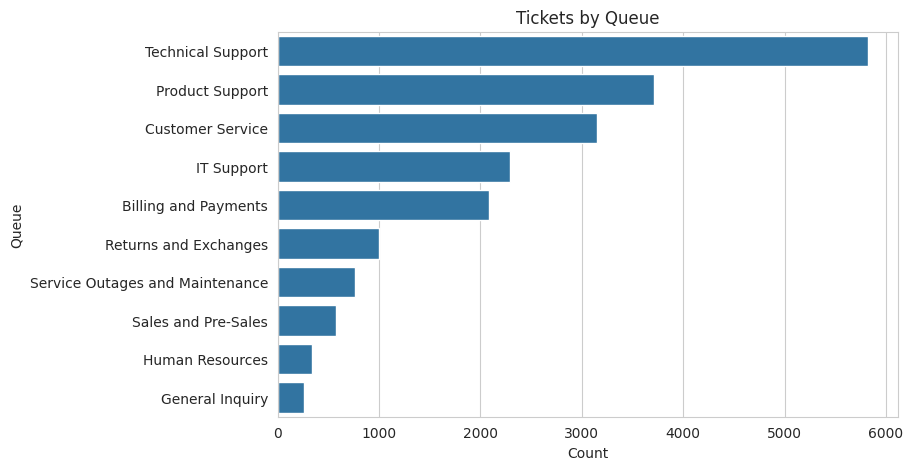

In [22]:
if 'Queue' in df.columns:
    sns.countplot(data=df, y='Queue', order=df['Queue'].value_counts().index)
    plt.title('Tickets by Queue')
    plt.xlabel('Count')
    plt.ylabel('Queue')
    plt.show()


**Module 4** Similarity & Cluster Insights

7. Average Similarity Score per Cluster

In [23]:
import pandas as pd

df = pd.read_csv('/content/infosys dataset.csv')

df['Created_Date'] = pd.to_datetime(df['Created_Date'], format='%d-%m-%Y', errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], format='%d-%m-%Y', errors='coerce')


In [25]:
df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days


In [26]:
median_resolution = df['Resolution_Duration'].median()
df['Resolution_Duration'].fillna(median_resolution, inplace=True)


/tmp/ipython-input-2536502624.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Resolution_Duration'].fillna(median_resolution, inplace=True)


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'].fillna('Unknown'))


In [67]:
priority_map = {
    'low': 1,
    'medium': 2,
    'high': 3
}

df['Priority_Score'] = df['Priority'].map(priority_map)


In [68]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Category_Encoded'] = le.fit_transform(df['Category'].fillna('Unknown'))


In [69]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'], format='%d-%m-%Y', errors='coerce')
df['Resolved_Date'] = pd.to_datetime(df['Resolved_Date'], format='%d-%m-%Y', errors='coerce')

df['Resolution_Duration'] = (df['Resolved_Date'] - df['Created_Date']).dt.days

median_duration = df['Resolution_Duration'].median()
df['Resolution_Duration'] = df['Resolution_Duration'].fillna(median_duration)


In [70]:
X = df[['Priority_Score', 'Resolution_Duration', 'Category_Encoded']]


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [72]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster_ID'] = kmeans.fit_predict(X_scaled)


In [73]:
import numpy as np

distances = np.linalg.norm(
    X_scaled - kmeans.cluster_centers_[df['Cluster_ID']], axis=1
)

df['Similarity_Score'] = 1 / (1 + distances)


In [74]:
df[['Cluster_ID', 'Similarity_Score', 'Resolution_Duration']].head()


,Cluster_ID,Similarity_Score,Resolution_Duration
0,1,0.429225,0.0
1,1,0.557530,0.0
2,1,0.635799,0.0
3,3,0.474704,0.0
4,3,0.778589,0.0


In [42]:
cluster_similarity = (
    df.groupby('Cluster_ID')['Similarity_Score']
      .mean()
      .sort_values(ascending=False)
)

cluster_similarity


,Similarity_Score
Cluster_ID,
2,0.608763
3,0.530197
1,0.521645
0,0.392195


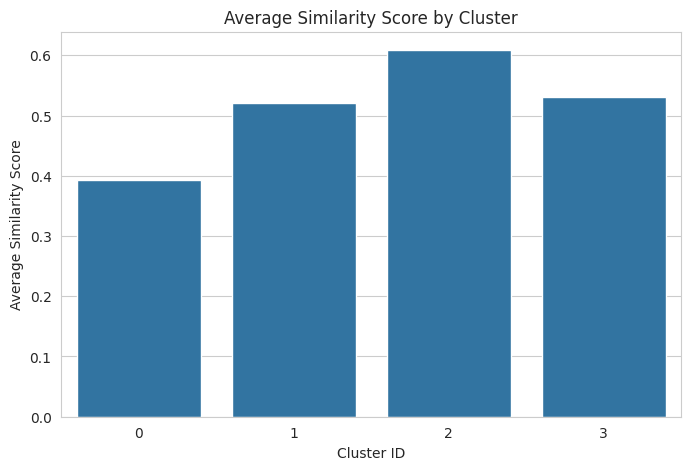

In [43]:
sns.barplot(x=cluster_similarity.index, y=cluster_similarity.values)
plt.title('Average Similarity Score by Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Average Similarity Score')
plt.show()


8. Cluster Size vs Issue Type

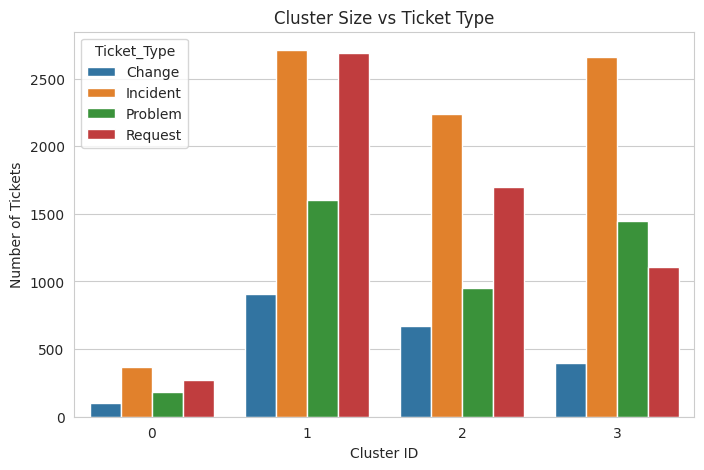

In [44]:
cluster_size = df.groupby(['Cluster_ID', 'Ticket_Type']).size().reset_index(name='Count')

sns.barplot(data=cluster_size, x='Cluster_ID', y='Count', hue='Ticket_Type')
plt.title('Cluster Size vs Ticket Type')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Tickets')
plt.show()


9. Resolution Duration vs Priority (Boxplot)

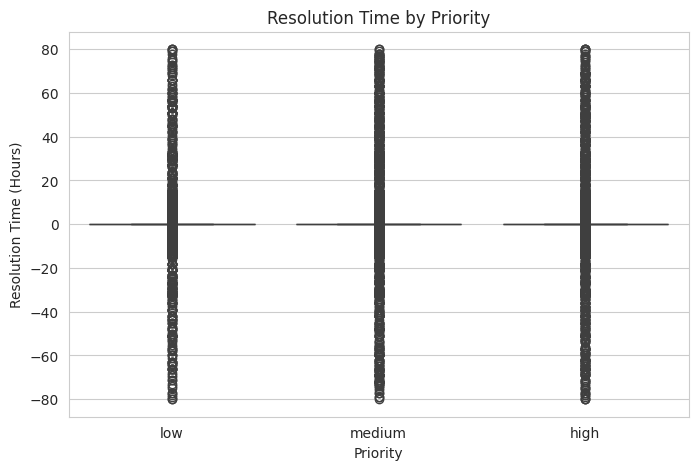

In [45]:
sns.boxplot(data=df, x='Priority', y='Resolution_Duration')
plt.title('Resolution Time by Priority')
plt.xlabel('Priority')
plt.ylabel('Resolution Time (Hours)')
plt.show()


10. Similarity Score vs Resolution Duration (Scatter)

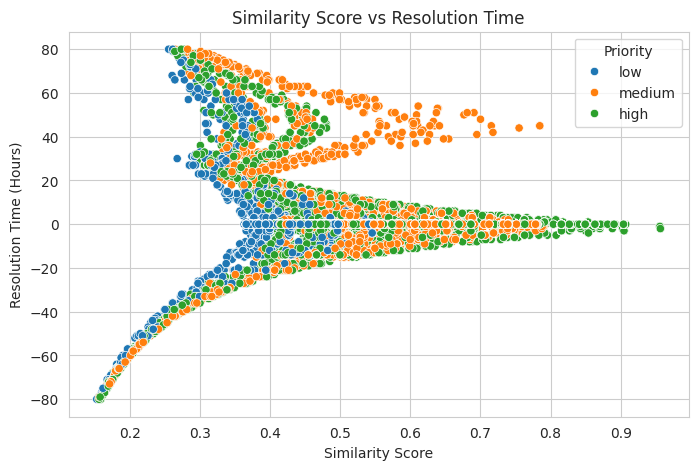

In [46]:
sns.scatterplot(data=df, x='Similarity_Score', y='Resolution_Duration', hue='Priority')
plt.title('Similarity Score vs Resolution Time')
plt.xlabel('Similarity Score')
plt.ylabel('Resolution Time (Hours)')
plt.show()


11. Cluster Performance Gap Analysis

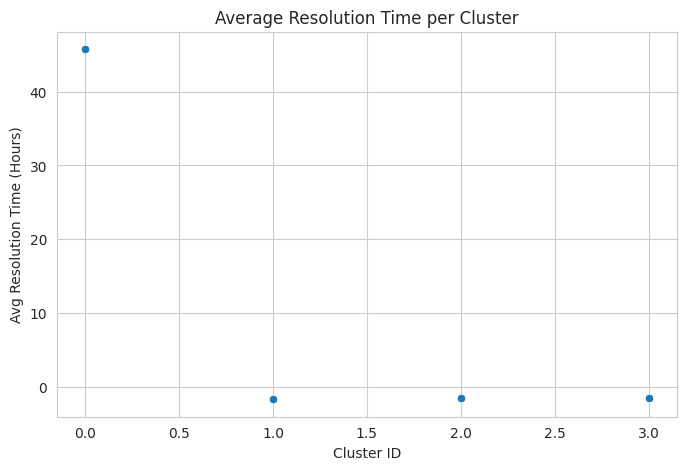

In [47]:
cluster_perf = df.groupby('Cluster_ID')['Resolution_Duration'].mean().reset_index()

sns.scatterplot(data=cluster_perf, x='Cluster_ID', y='Resolution_Duration')
plt.title('Average Resolution Time per Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Avg Resolution Time (Hours)')
plt.show()


**MILESTONE 3**

Module 5 Performance Trend Analysis

1. Load Data

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/cleaned_it_support_data.csv')


2. Average Resolution Time by Priority

In [53]:
priority_perf = df.groupby('Priority')['Resolution_Duration'].mean().sort_values()

priority_perf


,Resolution_Duration
Priority,
low,0.401233
high,0.598257
medium,0.729740


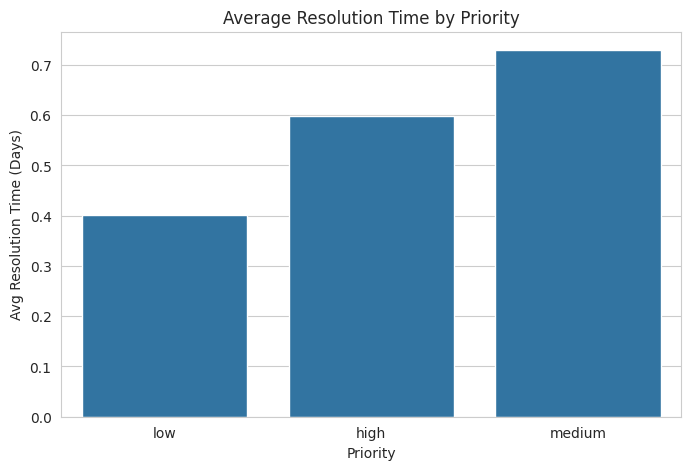

In [56]:
sns.barplot(x=priority_perf.index, y=priority_perf.values)
plt.title("Average Resolution Time by Priority")
plt.xlabel("Priority")
plt.ylabel("Avg Resolution Time (Days)")
plt.show()


3. Average Resolution Time by Ticket Type

In [54]:
type_perf = df.groupby('Ticket_Type')['Resolution_Duration'].mean().sort_values()
type_perf


,Resolution_Duration
Ticket_Type,
Problem,0.495698
Request,0.521256
Incident,0.668714
Change,0.879036


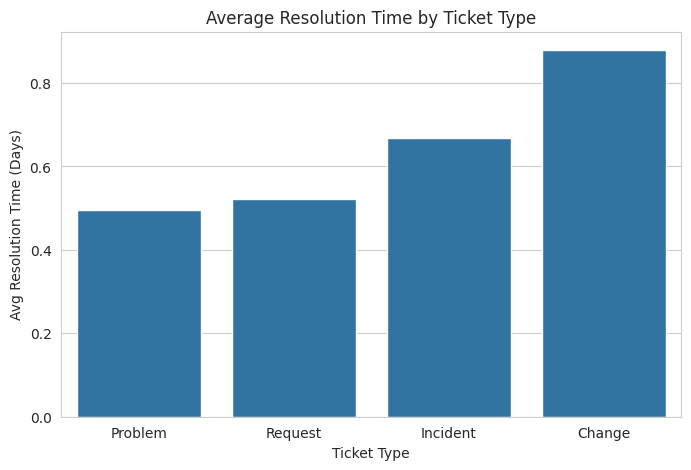

In [57]:
sns.barplot(x=type_perf.index, y=type_perf.values)
plt.title("Average Resolution Time by Ticket Type")
plt.xlabel("Ticket Type")
plt.ylabel("Avg Resolution Time (Days)")
plt.show()


4. Fastest Handling Teams

In [58]:
team_perf = df.groupby('Assigned_Team')['Resolution_Duration'].mean().sort_values()

team_perf.head()


,Resolution_Duration
Assigned_Team,
1 - Junior,0.396901
2 - Regular,0.500726
4 - Management,0.707531
3 - Senior,0.985286


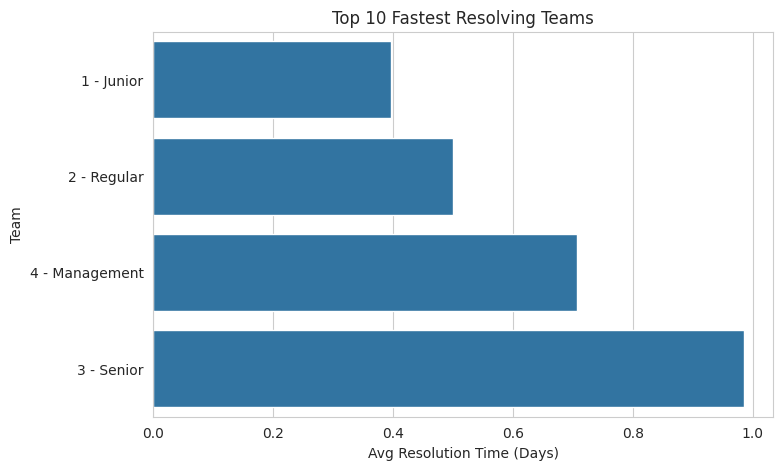

In [59]:
sns.barplot(x=team_perf.head(10).values, y=team_perf.head(10).index)
plt.title("Top 10 Fastest Resolving Teams")
plt.xlabel("Avg Resolution Time (Days)")
plt.ylabel("Team")
plt.show()


5. High-Priority Unresolved Issues

In [60]:
high_priority_unresolved = df[
    (df['Priority'] == 'high') &
    (df['Status'] != 'Resolved')
]

high_priority_unresolved[['Ticket_ID', 'Assigned_Team', 'Category']].head()


,Ticket_ID,Assigned_Team,Category
7,IT008,4 - Management,Integration
8,IT009,2 - Regular,Bug
9,IT010,3 - Senior,Performance
11,IT012,2 - Regular,Bug
14,IT015,3 - Senior,Network


In [61]:
high_priority_unresolved.shape


(5763, 10)

6. Count of Unresolved High Priority Tickets

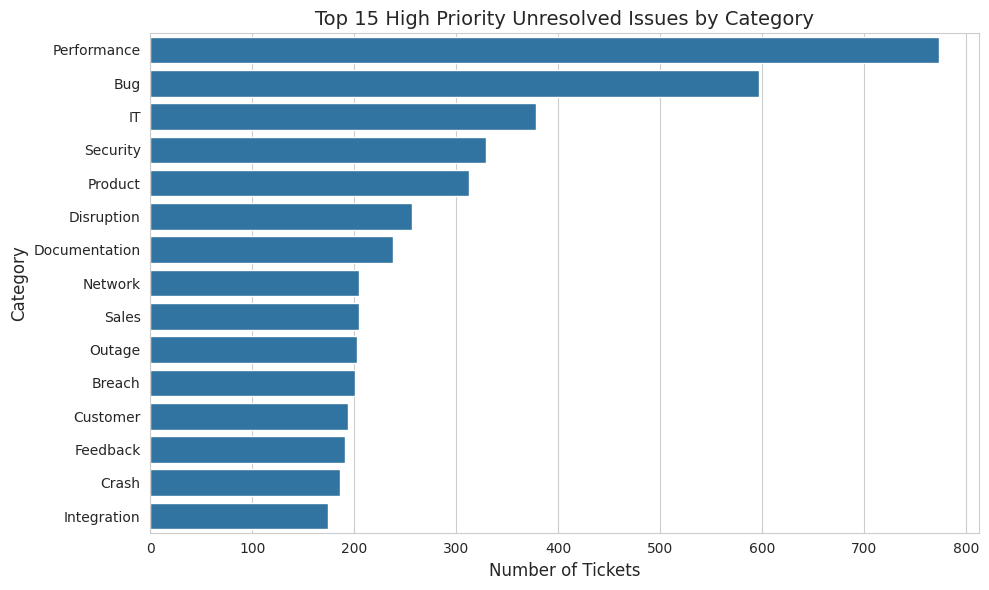

In [63]:
# Count high-priority unresolved by category
category_counts = high_priority_unresolved['Category'].value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.values, y=category_counts.index)
plt.title("Top 15 High Priority Unresolved Issues by Category", fontsize=14)
plt.xlabel("Number of Tickets", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.tight_layout()
plt.show()


Module 6 Geographic & Category-Level Insights

7. Ticket Concentration by Queue (Region Proxy)

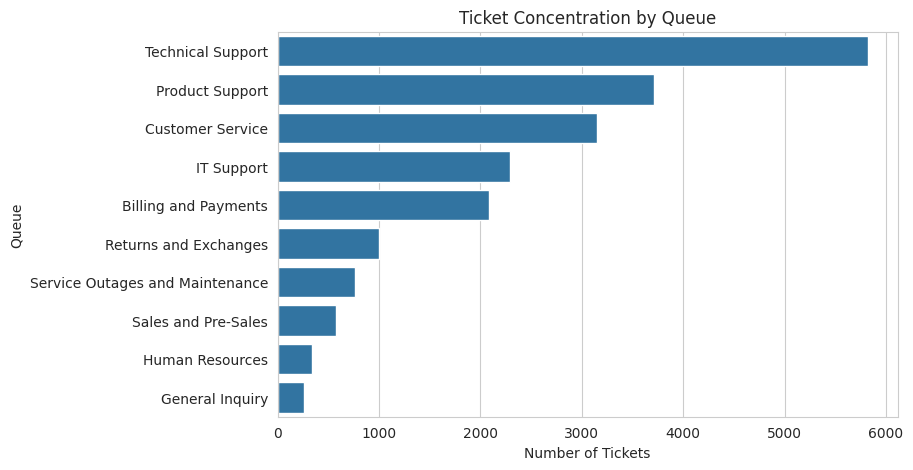

In [64]:
queue_dist = df['Queue'].value_counts()

sns.barplot(x=queue_dist.values, y=queue_dist.index)
plt.title("Ticket Concentration by Queue")
plt.xlabel("Number of Tickets")
plt.ylabel("Queue")
plt.show()


8. Category vs Resolution Time

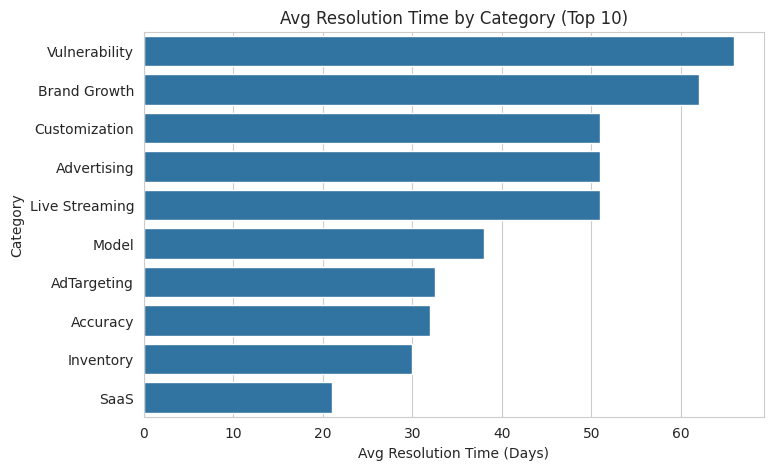

In [65]:
category_perf = df.groupby('Category')['Resolution_Duration'].mean().sort_values(ascending=False)

sns.barplot(x=category_perf.head(10).values, y=category_perf.head(10).index)
plt.title("Avg Resolution Time by Category (Top 10)")
plt.xlabel("Avg Resolution Time (Days)")
plt.ylabel("Category")
plt.show()


9. Cluster Size vs Performance

In [75]:
df['Cluster_ID'].value_counts()


,count
Cluster_ID,
1,7914
3,5612
2,5557
0,917


In [76]:
cluster_size = df['Cluster_ID'].value_counts().sort_index()
cluster_perf = df.groupby('Cluster_ID')['Resolution_Duration'].mean().sort_index()


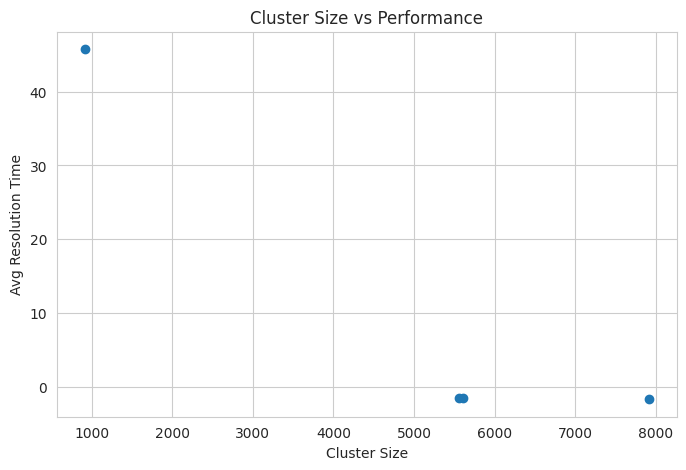

In [77]:
plt.scatter(cluster_size, cluster_perf)
plt.xlabel("Cluster Size")
plt.ylabel("Avg Resolution Time")
plt.title("Cluster Size vs Performance")
plt.show()


10. Performance Gaps Across Clusters (Boxplot)

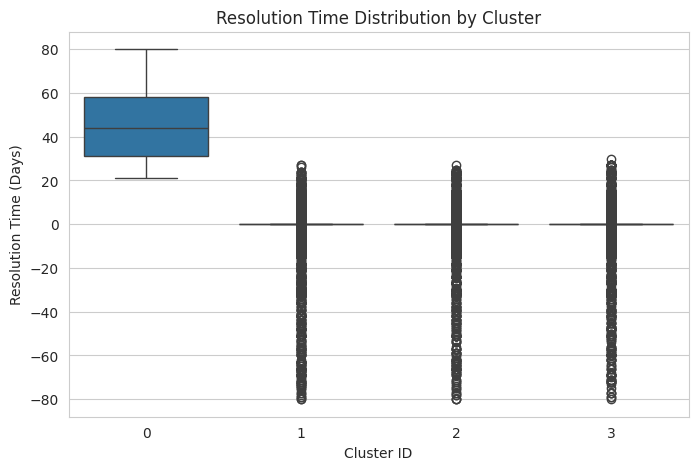

In [78]:
sns.boxplot(data=df, x='Cluster_ID', y='Resolution_Duration')
plt.title("Resolution Time Distribution by Cluster")
plt.xlabel("Cluster ID")
plt.ylabel("Resolution Time (Days)")
plt.show()


PERFORMANCE METRICS SUMMARY

In [79]:
summary = {
    "Avg Resolution Time by Priority": priority_perf,
    "Avg Resolution Time by Ticket Type": type_perf,
    "Top Fastest Teams": team_perf.head(10),
    "Cluster Performance": cluster_perf
}

summary


{'Avg Resolution Time by Priority': Priority
 low       0.401233
 high      0.598257
 medium    0.729740
 Name: Resolution_Duration, dtype: float64,
 'Avg Resolution Time by Ticket Type': Ticket_Type
 Problem     0.495698
 Request     0.521256
 Incident    0.668714
 Change      0.879036
 Name: Resolution_Duration, dtype: float64,
 'Top Fastest Teams': Assigned_Team
 1 - Junior        0.396901
 2 - Regular       0.500726
 4 - Management    0.707531
 3 - Senior        0.985286
 Name: Resolution_Duration, dtype: float64,
 'Cluster Performance': Cluster_ID
 0    45.735005
 1    -1.669447
 2    -1.502429
 3    -1.450641
 Name: Resolution_Duration, dtype: float64}